In [1]:
import kaggle
import zipfile
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!kaggle competitions download -c titanic

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 1.01MB/s]


In [4]:
with zipfile.ZipFile('titanic.zip' , 'r') as file:
    file.extractall('data')

In [9]:
os.listdir('data/')

['test.csv', 'train.csv', 'gender_submission.csv']

In [2]:
train_df = pd.read_csv('data/train.csv' , index_col='PassengerId')
test_df = pd.read_csv('data/test.csv' , index_col='PassengerId')
sample= pd.read_csv('data/gender_submission.csv')

In [3]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
train_df.shape , test_df.shape

((891, 11), (418, 10))

In [5]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
inputs = train_df.drop('Survived' ,axis=1)
targets = train_df.Survived

In [9]:
num_cols = inputs.select_dtypes(include = ['int', 'float']).columns

In [10]:
num_cols

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
inputs.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Age'>

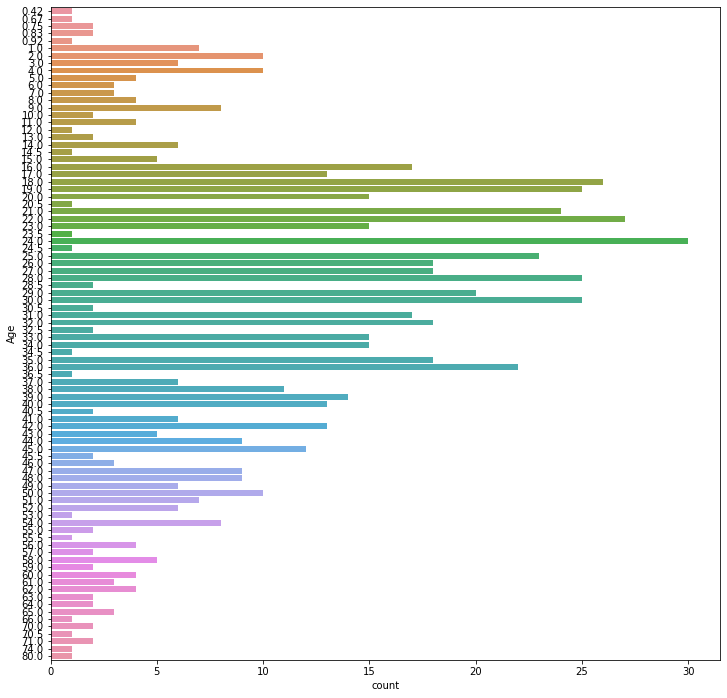

In [25]:
plt.figure(figsize=(12 , 12))
sns.countplot(y='Age',data=inputs)

In [26]:
inputs.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

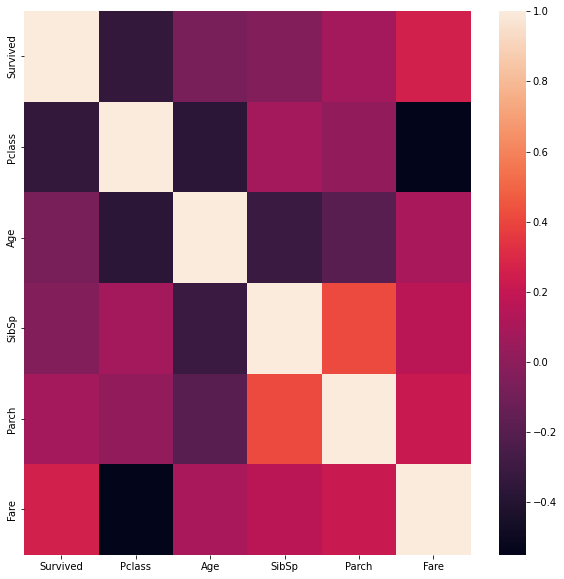

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr())

In [40]:
inputs[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 74.1 KB


In [47]:
targets.shape

(891,)

In [30]:
# ML imports 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [49]:
train_inputs , val_inputs , train_targets ,val_targets = train_test_split(inputs[num_cols].fillna(method='ffill') , targets , test_size=0.1 , random_state=1)

In [50]:
train_inputs.shape , train_targets.shape

((801, 5), (801,))

In [51]:
logreg = LogisticRegression(random_state=1)
logreg.fit(train_inputs, train_targets)
acc_log = round(logreg.score(val_inputs, val_targets) * 100, 2)
print(acc_log)

71.11


In [58]:
(targets.value_counts()/targets.size)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [62]:
preds = logreg.predict(test_df[num_cols].fillna(method='ffill'))

In [70]:
submit = pd.DataFrame({'PassengerId':test_df.index ,
                      'Survived':preds})
submit.to_csv('./submission_csv')

In [71]:
os.listdir()

['.DS_Store',
 'Titanic-prediction.ipynb',
 'README.md',
 '.gitignore',
 'submission_csv',
 'titanic.zip',
 '.ipynb_checkpoints',
 '.git',
 'data']

In [72]:
submission_csv

',PassengerId,Survived\n0,892,0\n1,893,0\n2,894,0\n3,895,0\n4,896,0\n5,897,0\n6,898,0\n7,899,0\n8,900,0\n9,901,0\n10,902,0\n11,903,1\n12,904,1\n13,905,0\n14,906,1\n15,907,0\n16,908,0\n17,909,0\n18,910,0\n19,911,0\n20,912,0\n21,913,0\n22,914,1\n23,915,1\n24,916,1\n25,917,0\n26,918,1\n27,919,0\n28,920,1\n29,921,0\n30,922,0\n31,923,0\n32,924,0\n33,925,0\n34,926,1\n35,927,0\n36,928,0\n37,929,0\n38,930,0\n39,931,0\n40,932,0\n41,933,1\n42,934,0\n43,935,0\n44,936,1\n45,937,0\n46,938,1\n47,939,0\n48,940,0\n49,941,0\n50,942,1\n51,943,0\n52,944,0\n53,945,1\n54,946,0\n55,947,0\n56,948,0\n57,949,0\n58,950,0\n59,951,1\n60,952,0\n61,953,0\n62,954,0\n63,955,0\n64,956,1\n65,957,1\n66,958,0\n67,959,1\n68,960,1\n69,961,1\n70,962,0\n71,963,0\n72,964,0\n73,965,1\n74,966,1\n75,967,1\n76,968,0\n77,969,0\n78,970,0\n79,971,0\n80,972,0\n81,973,1\n82,974,1\n83,975,0\n84,976,0\n85,977,0\n86,978,0\n87,979,0\n88,980,0\n89,981,1\n90,982,0\n91,983,0\n92,984,1\n93,985,0\n94,986,1\n95,987,0\n96,988,0\n97,989,0\n98,990